# Analyzing FCB's players

## Load the data

In [29]:
# Third-party libraries
import pandas as pd
from statsbombpy import sb

# Custom modules
from src.functions import prepare_team_data, get_player_shots

events, shots, assists = prepare_team_data('Barcelona')
shots.head()

529


,match_id,x,y,float_time,player,shot_outcome,shot_type,minutes,goal,shot_statsbomb_xg
id,,,,,,,,,,
4ade6c91-08c8-41f9-bdaf-e6dc5287a2a8,3825660,99.6,26.7,6.600000,Luis Suárez,Off T,Open Play,92.02535,False,0.042416
61e1070a-d214-4411-83c7-d50275d14d5a,3825660,104.1,49.1,7.966667,Luis Suárez,Wayward,Open Play,92.02535,False,0.046983
8657b856-7061-4cea-912e-36670704f22c,3825660,95.7,35.7,18.166667,Alves,Blocked,Open Play,92.02535,False,0.033660
7e075db9-7f56-440d-87b6-02a01cf92881,3825660,109.9,44.1,21.866667,Jérémy Mathieu,Saved,Open Play,92.02535,False,0.062639
def121ed-b09c-4e8b-a1a5-51882665a6fc,3825660,114.9,52.1,23.966667,Iniesta,Blocked,Open Play,92.02535,False,0.082039


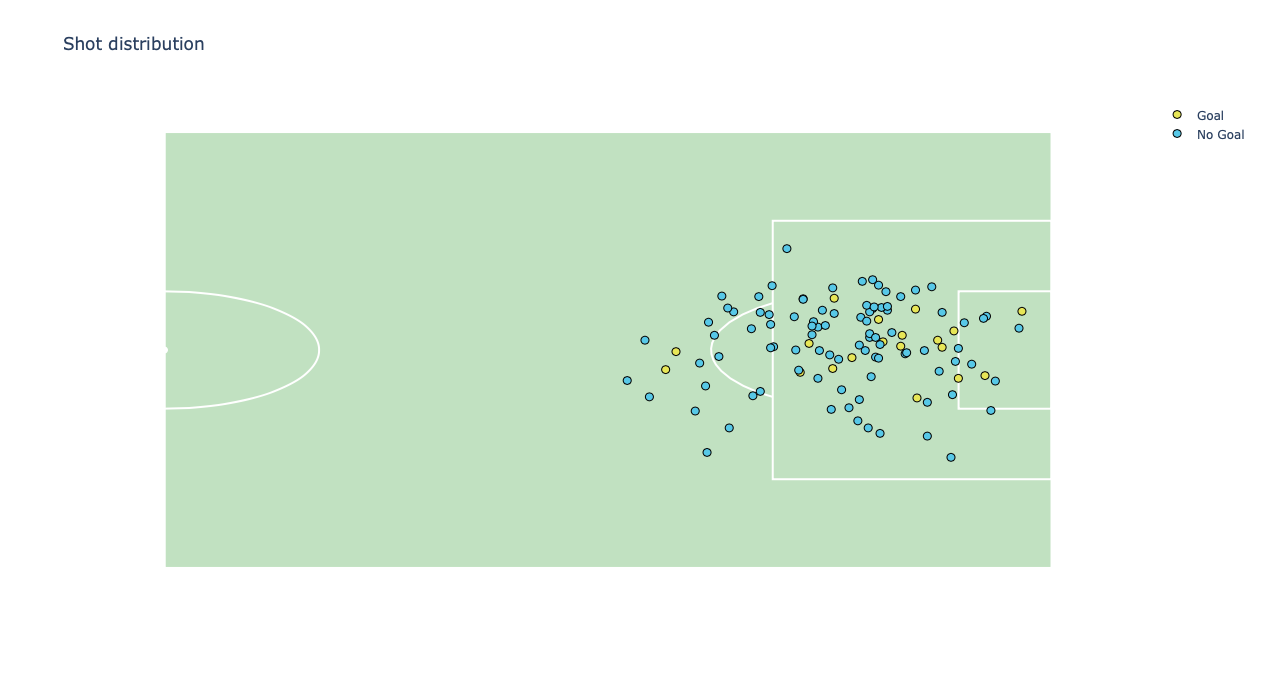

In [30]:

import plotly.graph_objects as go
from src.classes import FootballPitch

player = 'Leo Messi'

pitch = FootballPitch(half=True)
fig = pitch.plot_pitch(False, bg_color='#C1E1C1') 

player_shots = get_player_shots(player, shots.copy(), pitch)
scatter_colors = ["#E7E657", "#57C8E7"]

for i, group in enumerate([True, False]):
    fig.add_trace(go.Scatter(
        x=player_shots[player_shots['goal'] == group]['x'],
        y=player_shots[player_shots['goal'] == group]['y'],
        mode="markers",
        name='Goal' if group else 'No Goal',
        marker=dict(
            color=scatter_colors[i],
            size=8,
            line=dict(
                color='black',
                width=1
            )
        ),
    ))

fig.update_layout(
    title='Shot distribution'
)

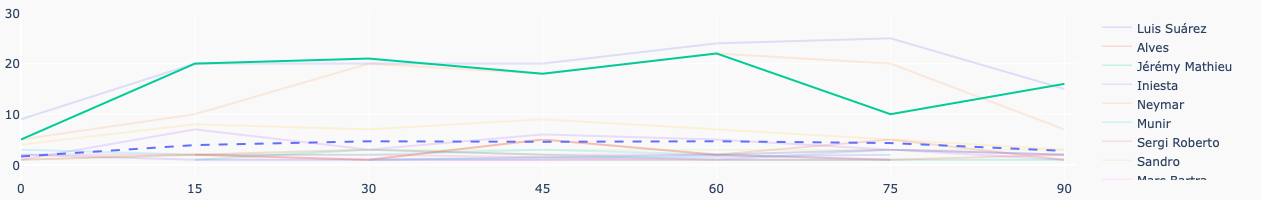

In [34]:
from plotly.subplots import make_subplots
player = 'Leo Messi'
max_shots = 0
fig = make_subplots()

for p in shots.player.unique():
    player_shots = get_player_shots(p, shots)

    xy = 15 * (player_shots[['float_time', 'minutes']]/15).round()
    xy = xy.groupby(['float_time']).count()[['minutes']]

    max_shots = xy.minutes.max() if xy.minutes.max() > max_shots else max_shots
    
    fig.add_trace(
        go.Scatter(
            name=p,
            x = xy.index, 
            y = xy.minutes,
            mode='lines',
            opacity=1 if p == player else 0.2
        )
    )

# Add team's avg
xy = 15 * (shots[['float_time', 'minutes']]/15).round()
xy = xy.groupby(['float_time']).count()[['minutes']]/len(shots.player.unique())

fig.add_trace(
    go.Scatter(
        name="Team's Average",
        x = xy.index, 
        y = xy.minutes,
        line = go.scatter.Line(dash='dash'),
        marker=None,
        mode='lines'
    )
)

fig.update_xaxes(range=[0, 91])
fig.update_layout(
    #title='Shots by Quarter',
    margin=dict(l=20, r=20, t=5, b=20),
    xaxis = dict(
        tickmode = 'array',
        tickvals = xy.index.values
    ),
    height=200,
    plot_bgcolor="#F9F9F9", #COLOR_SCALE[0],
    paper_bgcolor="#F9F9F9", #COLOR_SCALE[0],
    yaxis_range=[-3,max_shots+5]
)